In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from PI_client import pi_client
pi = pi_client()
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)

# Main Import
import mnv14 as mnv
print(mnv.version)
print("Success!")

Version 1.4
Success!


### Local Data Loading

In [2]:
filePath = 'data/arc2yeardata.xlsx'
data = pd.read_excel(filePath, header=0, index_col=0, parse_date=True)
print(data.columns)

Index([u'chw', u'elec', u'steam'], dtype='object')


### PI Data Loading

In [3]:
tags = pi.search_by_point('*ghausi*kbtu')[0]
print(tags)

[u'Ghausi_ChilledWater_Demand_kBtu', u'Ghausi_Electricity_Demand_kBtu', u'Ghausi_Steam_Demand_kBtu']


#### Pull tags

In [4]:
startDate = '2017-01-01'
endDate = '2018-01-01'
interval = '1 hour' #Can be "minute" "hour" "day"
calculation = 'calculated' # Redundant?

# data = pi.get_stream_by_point(tags, start=startDate, end=endDate, interval=interval, calculation=calculation)

# Data Section

Q(75%): 98.31 Q(25%): 0.13
IQR value is 98.19
Ceiling adjusted by IQR - Now 491.06
OAT being loaded from master file


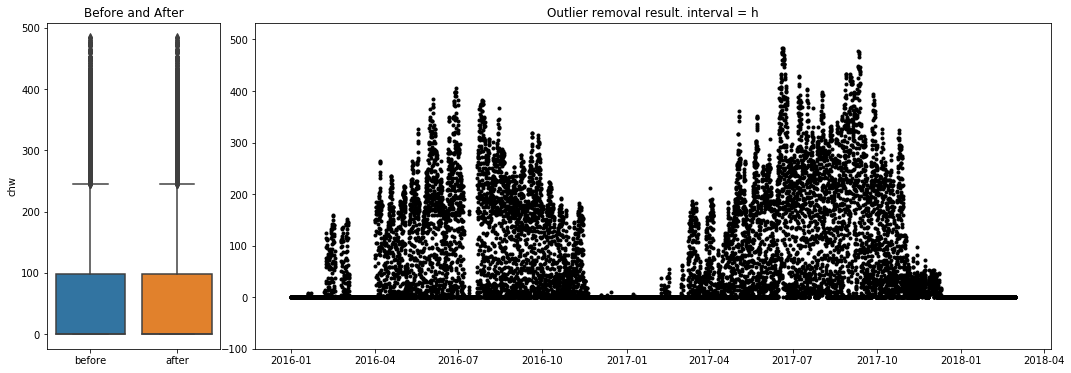

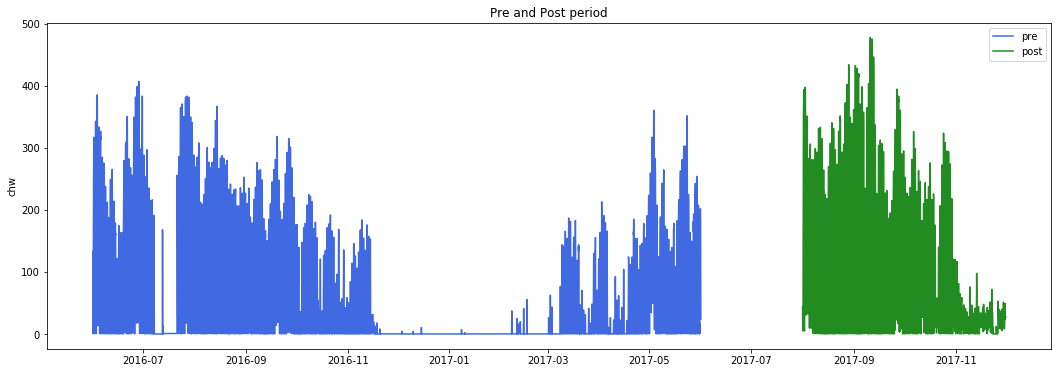

In [5]:
inputDict = {'IQRmult' : 4.0,
             'IQR' : 'y', 
             'resampleRate' : 'h', #'D' for daily 'H' for hourly
             'OATsource' : 'file', #'self' or 'file'
             'OATname' : 'OAT', #Name of OAT column if OATsource is 'self'} #only needed with sliceType : 'ranges'
             'sliceType' : 'ranges', #half, middate, ranges
             'midDate' : '2017-01-01', #only needed with sliceType : 'middate'
             'dateRanges' : ['2016-06-01','2017-06-01','2017-08-01','2017-12-01'], #only needed with sliceType : 'ranges'
            }

columnIndex = 0
dc = mnv.data_handler(data[data.columns[columnIndex]], inputDict)
dc.default_clean()

### default_clean() explained ###

# self.remove_outliers()
#- IQR : Y/N , IQRmulti = 3

# self._resample(resampleRate = 'H', aggFun = 'mean')
#- Basic resampling to align everything on hr mark, and most models are not less than 1hr resolution

# self.add_degree_hours()
#- Pull OAT data from source or from provided data
#- OATsource = file/self; OATname = "OAT"

# self._resample(aggFun = 'sum')
#- resampleRate = 'D' / 'H'

# self.add_time_columns()
#- Adds 'reduced' dummy columns

#  self.data_slice()
#- Slice data into pre and post
#- sliceType = 'half','middate','ranges'
#- half: split the data 50/50 
#- middate = split the data at one particular date [start:mid] and [mid:end]
#- ranges = split the data into specific ranges pre = [s1:e1] post = [s2:e2]



## Run the next line incase the y-range is FUBAR
dc._outlier_plot(dc.modifiedData[dc.com], yrange=(-100,dc.modifiedData[dc.com].max()*1.1)) 

## plot pre/post
dc._pre_post_plot()

# Single Linear Model

                 VIF
const      14.255907
CDH         1.434133
month_2     1.757233
month_3     1.832305
month_4     1.813296
month_5     1.916502
month_6     2.020456
month_7     2.047004
month_8     1.992237
month_9     1.921913
month_10    1.840333
month_11    1.807145
month_12    1.830137
weekday_1   1.003721

Kfold
Stats
         R2       AR2          mse
3  0.829044  0.828726  1350.397395
2  0.824467  0.824141  1360.187496
1  0.822530  0.822200  1365.293244
4  0.823805  0.823478  1390.498682
0  0.820794  0.820461  1399.672311
Relative stats
3        98.353780
2        99.066824
1        99.438692
4       101.274485
0       101.942630
mse    1373.000000
dtype: float64


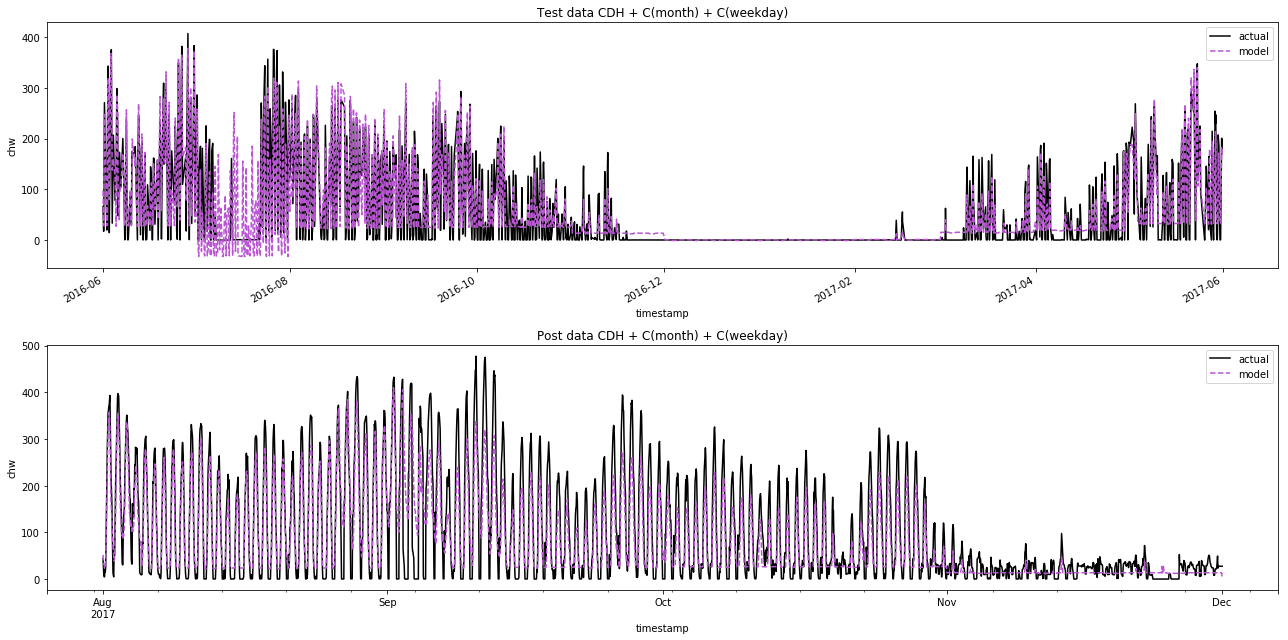

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chw   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     2464.
Date:                Mon, 16 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:06:38   Log-Likelihood:                -35320.
No. Observations:                7008   AIC:                         7.067e+04
Df Residuals:                    6994   BIC:                         7.076e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.8710      1.679     -0.519      0.604      -4.162       2.420
C(month)[T.2L]       0.7816      2.221      0.352      0.725      -3.572       5.135
C(month)[T.3L]      14.9515      2.160      6.921      0.000      10.717      19.186
C(month)[T.4L]      19.0481      2.180      8.738      0.000      14.775      23.321
C(month)[T.5L]      32.2029      2.198     14.649      0.000      27.893      36.512
C(month)[T.6L]      27.8662      2.279     12.229      0.000      23.399      32.333
C(month)[T.7L]     -31.4216      2.302    -13.648      0.000     -35.935     -26.909
C(month)[T.8L]      23.3021      2.248     10.364      0.000      18.895      27.709
C(month)[T.9L]      24.6899      2.264     10.907      0.000      20.252      29.127
C(month)[T.10L]     26.1526      2.179     12.003      0.000      21.881      30.424
C(month)[T.11L]     13.2017      2.171      6.081      0.000       8.946      17.458
C(month)[T.12L]      0.0685      2.161      0.032      0.975      -4.168       4.305
C(weekday)[T.1L]     1.2728      0.994      1.281      0.200      -0.675       3.221
CDH                  9.6407      0.066    145.007      0.000       9.510       9.771
==============================================================================
Omnibus:                     1681.909   Durbin-Watson:                   0.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22194.782
Skew:                          -0.777   Prob(JB):                         0.00
Kurtosis:                      11.579   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
modelDict = {'params': ['CDH','month','weekday'], #CDH2 + C(weekday) + C(month)
             'testTrainSplit': 'random',
             'randomState': None,
             'testSize': 0.2,
             'commodityRate': 0.056, 
             'paramPermuteList': ['', 'C(hour)', 'C(weekday)', 'C(month)']} ## Unused here


mod = mnv.ols_model(dc.pre, dc.post, modelDict)
### ols_model explained ###

# self.split_test_train(how=self.params.testTrainSplit)
#- Splits the pre period into a test and train 
#- testTrainSplit: "random" / "simple"
#- randomState: None or integer
#-- seed value for random number generator
#- testSize: fraction of data in "pre" period that will be included in the "test"

# self.Model = smf.ols(self.com + '~' + self.params.paramString, data=self.train)
#- Calculates linear model using training data and supplied parameters

# self.Fit = self.Model.fit()
#- Creates an object which can take in the independent variables to calculate the dependent variable

# #Make predictions called "Calcs"
# self.trainCalc = self.Fit.predict(self.train)
# self.testCalc = self.Fit.predict(self.test)
# self.postCalc = self.Fit.predict(post)

# Calcualte the difference in values of the model and the actual "post" data
# self.postDiff = self.postCalc - self.post[self.com]
# self.postCumsum = self.postDiff.cumsum()[-1]

mod.model_plot()

mod.kfold()
mod.calculate_vif()

# print(mod.vif[mod.vif['VIF'] > 10])
print(mod.vif)

print('\nKfold')
print('Stats')
print(mod.kfoldStats)
print("Relative stats")
print(mod.kfoldRelative)


plt.show() # Show plot before Stats summary
mod.Fit.summary()

### Kfold (random)

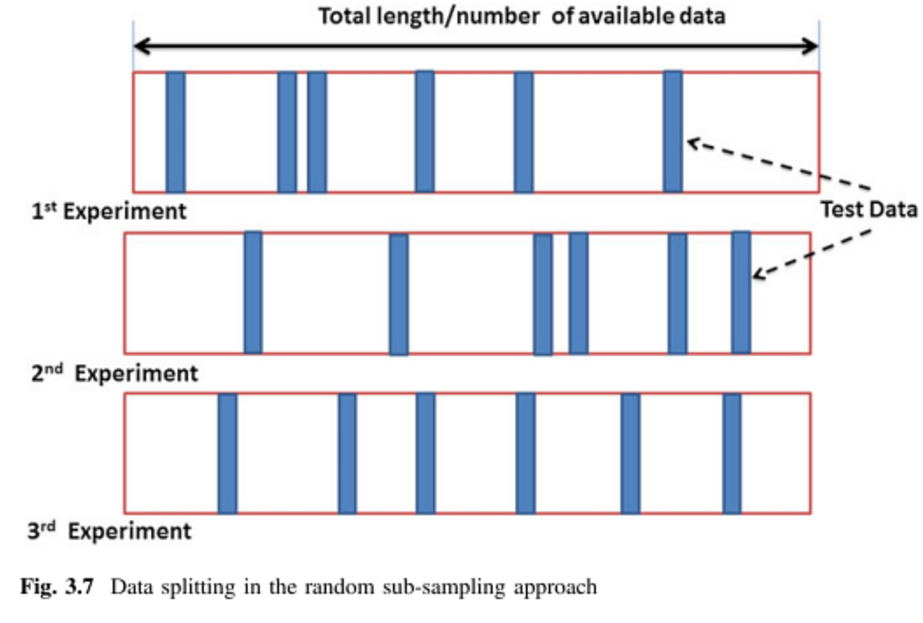

In [7]:
mod.params.paramString

'CDH + C(month) + C(weekday)'

### Savings

Savings = $-2963.6


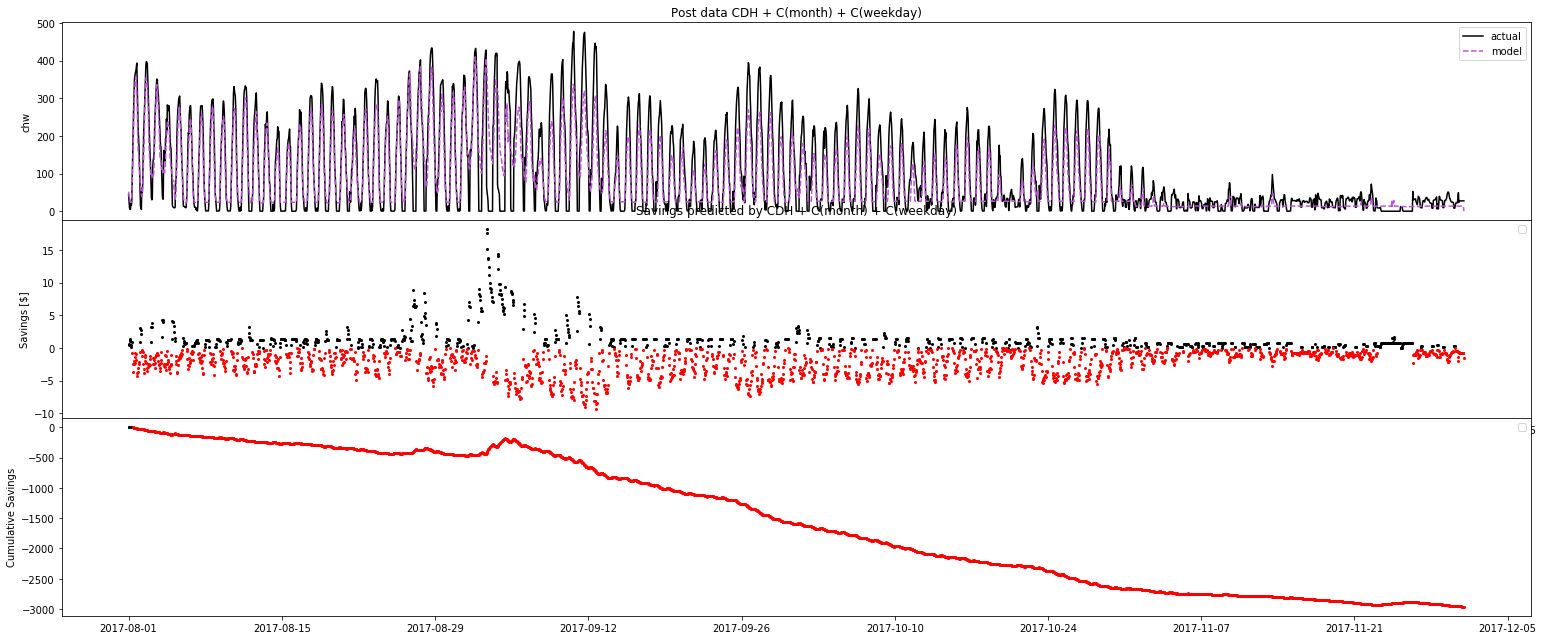

In [8]:
#rates = {'chw':0.056, 'steam':0.0157, 'elec':0.030} #kBTU prices for 2016(?)
#commodity = 'chw'

print("Savings = $" +str(round(mod.postCumsum * mod.params.commodityRate,1)))
mod.savings_plot(yaxis='dollars')

# Many Linear Models

        AIC       AR2        R2    cvrmse postDiff                               params                                            summary
13    70182   0.83387  0.834178  0.639482 -51382.6                 CDH + HDH + C(month)                              OLS Regression Res...
22  70182.9  0.833872  0.834204  0.639479 -51363.3    CDH + HDH + C(weekday) + C(month)                              OLS Regression Res...
10  70513.9  0.825812  0.826135  0.654808 -52491.9                CDH + HDH2 + C(month)                              OLS Regression Res...
30  70514.7  0.825818  0.826166  0.654796 -52470.2   CDH + HDH2 + C(weekday) + C(month)                              OLS Regression Res...
19  70603.4  0.823548  0.823851  0.659048 -52922.2                       CDH + C(month)                              OLS Regression Res...
20  70603.7  0.823567  0.823894  0.659014 -52895.4          CDH + C(weekday) + C(month)                              OLS Regression Res...
33  71253.1  0.806158  0.80

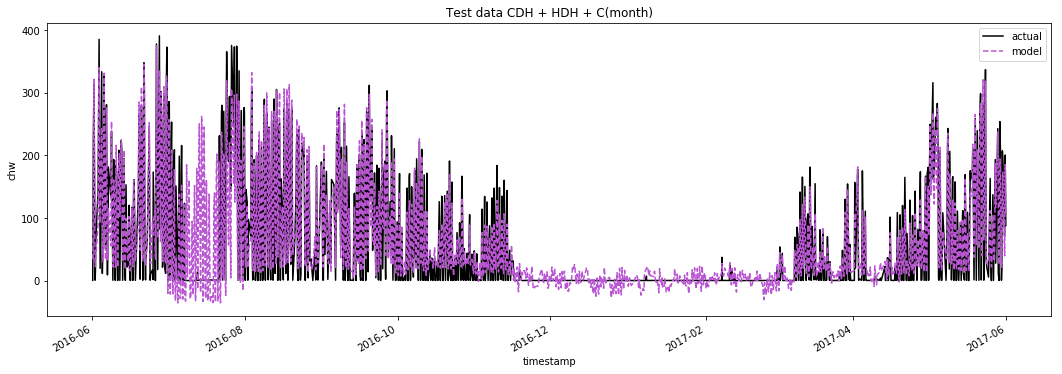

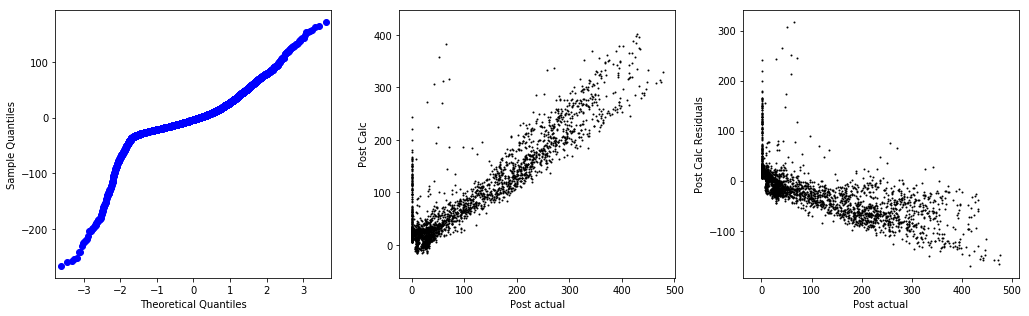

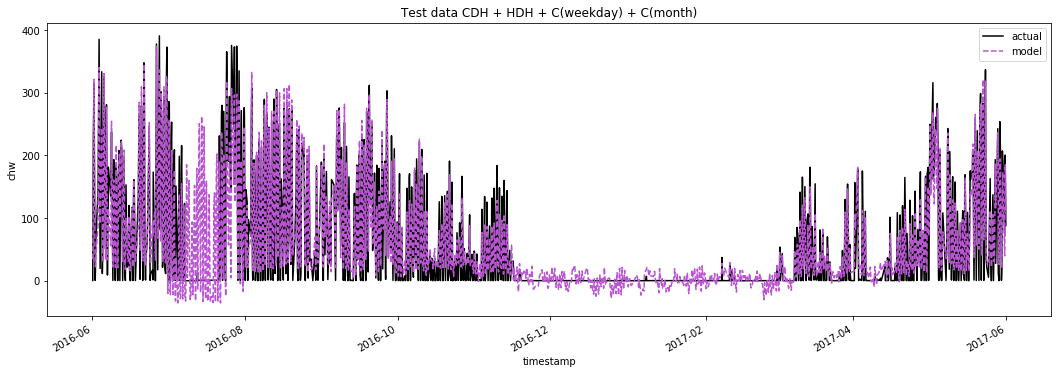

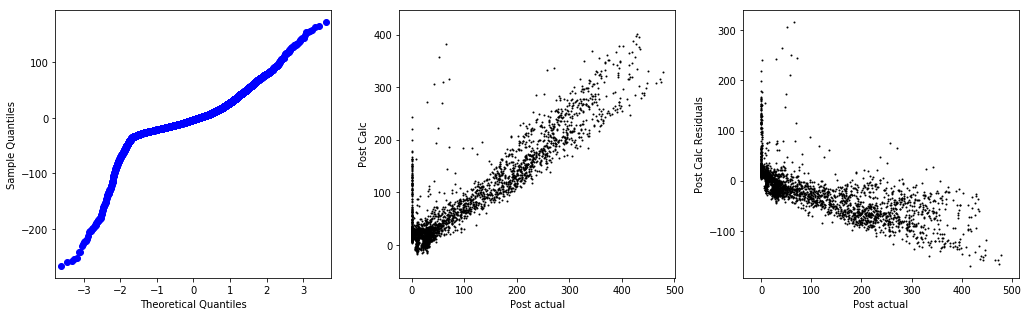

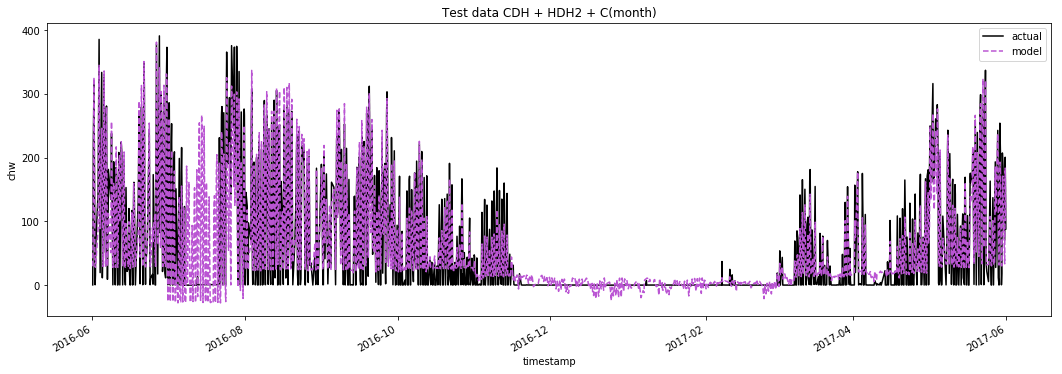

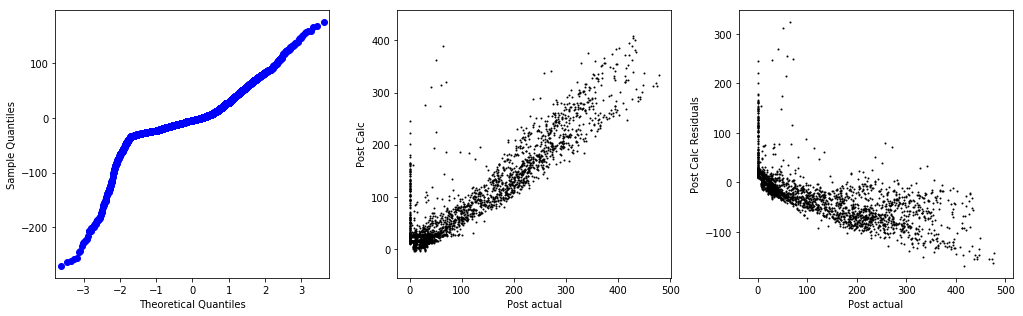

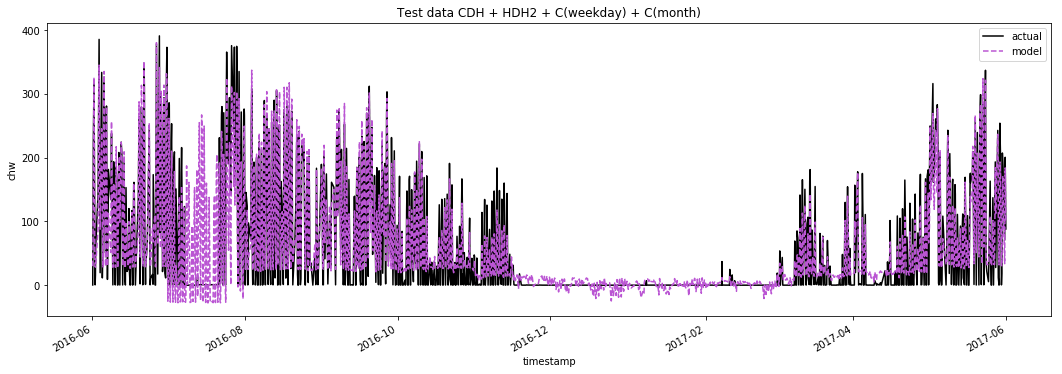

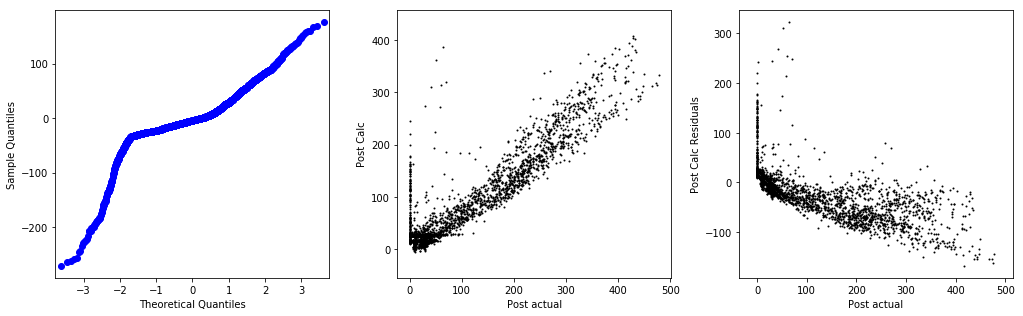

In [9]:
modelDict = {'params': ['CDH','HDH','month','hour','weekday'],
             'testTrainSplit': 'random',
             'randomState': 8273473,
             'testSize': 0.2,
             'commodityRate': 0.056,
             'paramPermuteList': ['', 'C(weekday)', 'C(month)']}

allmod = mnv.many_ols(dc.pre, dc.post, modelDict)
allmod.run_all_linear()

### many_ols ### explained
# run_all_linear(self)
# takes in paramPermuteList to generate all permutations of variables + 'CDH' / 'CDH2' and/or 'HDH' / 'HDH2'
# runs an OLS model with given input variables
# pools all stats so models can be compared


print(allmod.statsPool[0:20])
allmod.plot_pool(4)
modelDict['params'] = allmod.statsPool.iloc[0]['params']